In [1]:
import os
import regfile

## Navigate to Event File and Display Image
- In the cell below, input the path to the event file
- Input 'sequenceID', mod ('A' or 'B'), and image scale ('lin' or 'log')
    - SL region is often more visible in log scale 
    - If a bright point source is present, proceed to **Point Source Removal**. If not, skip to **Determine Canny Edge $\sigma$**.

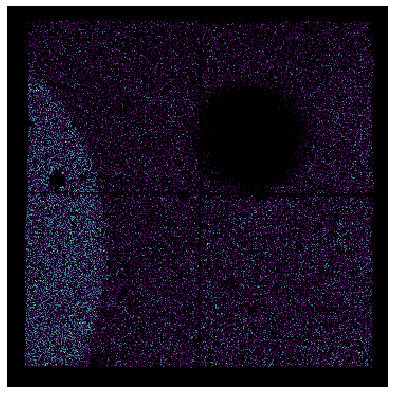

In [41]:
#define input path
input_path = '/Users/ellenthompson/Desktop/SL_Analysis/80002012004/event_cl'

#navigate to event file location
os.chdir(input_path)

#call lin or log image function
regfile.image('80002012004cut','A','log')

## Point Source Removal
 - function to be added to regfile and called here 
 - add notes on choosing limit for how much of the image to discard here
 - Replace original event file with point source removed file OR name new file something like 'nu'+str(seqid)+str(mod)+'cut'+'01_cl.evt'

In [64]:
#call point source removal function
regfile.ps_removal(seqid,mod,limit,output_path,name_of_ps_removed_file)

## Determine Canny Edge Detector $\sigma$
- In the cell below, input 'sequence ID', mod ('A' or 'b'), and energy cut values (emin and emax)
    - If a point source was removed, be sure to load in the new point source removed file 
    - Typically channels 36-209 (3-10keV) is best for energy cut 
- Run cell and choose first $\sigma$ from output plots that has SL region outlined and no detector edges (other than those the SL region touches) outlined. 
    - Some noise inside the SL region is OK, but it's ideal to avoid perimeter discontinuities AND minimize inner-region noise to avoid "zig-zagging" region as much as possible

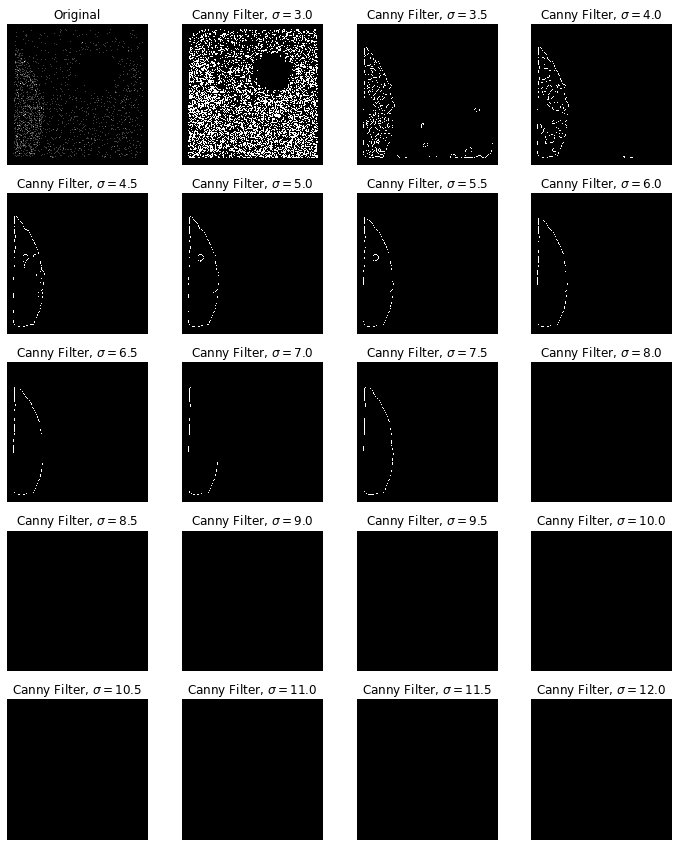

In [43]:
#call sigma range function
regfile.sigma_range('80002012004cut','A',36,209)

 - If "Original" image shows bright point source, remove point source by making an annulus region around it in ds9 and filtering with xselect 
  - Rename as 'nu'+'seqid'+'cut'+'mod'+'_cl.evt'
 - If you want to see whether a $\sigma$ in between two plotted values or a $\sigma>12$ would be optimal, call sigma function with your estimated value in the cell below

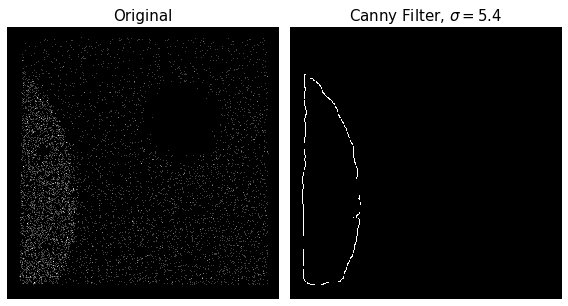

In [33]:
#call single sigma
regfile.sigma('80002012004cut','A',36,209,5.4)

## Check Region File
- Optional step: input'sequenceID', mod ('A' or 'B'), emin, emax, sigma, and image scale ('lin' or 'log') in the cell below to see what the region file looks like
    - If a point source was removed, be sure to load in the new point source removed file 
    - If the region file is not optimal, first try increasing the sigma value (can test using single sigma function or check function). If no sigma gives a good region file, try adjusting the energy cut band.

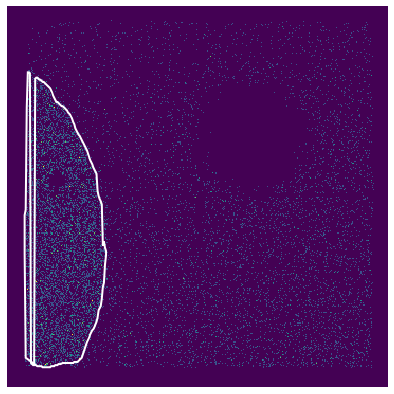

In [34]:
#call check function
regfile.check_region('80002012004cut','A',36,209,5.4,'lin')

## Write Region File
- In the cell below, input the event file seqid, 'sequence ID', 'mod', emin, emax, sigma, 'output path', and 'name of region file'
    - If a point source was removed, be sure to load in the new point source removed file
    - good idea to include target name, seqID, and mod in region file title 

In [35]:
#call write function 
regfile.write_regfile('80002012004cut','A',36,209,5.4,'/Users/ellenthompson/Desktop/SL_Analysis/80002012004/event_cl','GX_5-1_90401331002A.reg')

